## Import data


We will be using the Consumer Price Index (inflation) data for Singapore, which can be found at the following link: https://data.worldbank.org/indicator/FP.inflation.TOTL.ZG?locations=SG. This dataset provides annual percentage changes in the inflation, which is a measure of inflation.


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

inflation_df = pd.read_csv("../data/raw/worldbank_sg.csv",skiprows=4)
inflation_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Singapore,SGP,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,2.477868e-01,3.151297e-01,1.908236e-01,1.547845e-01,2.045546e-01,1.692085e-01,1.009921e-01,NaN,NaN,NaN
1,Singapore,SGP,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Singapore,SGP,"Voice and Accountability: Percentile Rank, Upp...",VA.PER.RNK.UPPER,NaN,NaN,NaN,NaN,NaN,NaN,...,4.926109e+01,4.876847e+01,4.729064e+01,5.097087e+01,4.492754e+01,4.637681e+01,4.975845e+01,5.265701e+01,5.196078e+01,NaN
3,Singapore,SGP,Voice and Accountability: Estimate,VA.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.617135e-01,-1.499044e-01,-1.688066e-01,-7.588456e-02,-2.060070e-01,-2.038816e-01,-1.395539e-01,-6.013257e-02,-6.541193e-02,NaN
4,Singapore,SGP,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.387529e+11,1.349404e+11,1.467690e+11,1.548927e+11,1.500563e+11,1.599399e+11,1.922236e+11,2.138330e+11,1.973876e+11,NaN


## Data Cleaning
In this step, we filter the dataset to include only the rows where the 'Indicator Name' is "Inflation, consumer prices (annual %)". We then reshape the dataframe using the melt function to transform the year columns into rows, with 'Year' as a variable and 'Inflation Rate' as the value. After that, we select only the 'Year' and 'Inflation Rate' columns and drop any rows with missing values.


In [4]:
inflation_df = inflation_df[inflation_df['Indicator Name'] == "Inflation, consumer prices (annual %)"]
inflation_df = inflation_df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                     var_name="Year", 
                     value_name="Inflation Rate")

inflation_df = inflation_df[["Year", "Inflation Rate"]]
inflation_df = inflation_df.dropna()
inflation_df['Year'] = inflation_df['Year'].astype(int)

inflation_df.head()

,Year,Inflation Rate
1,1961,0.400000
2,1962,0.419580
3,1963,2.205200
4,1964,1.726096
5,1965,0.178611


## Exploratory Data Analysis (EDA)

The dataset contains annual inflation rates for Singapore. We analyze inflation trends over time, check for stationarity, and visualize the data distribution.




In [5]:
inflation_df.describe()

,Year,Inflation Rate
count,63.000000,63.000000
mean,1992.000000,2.564436
std,18.330303,3.967285
min,1961.000000,-1.841893
25%,1976.500000,0.494014
50%,1992.000000,1.726096
75%,2007.500000,3.132041
max,2023.000000,22.368421


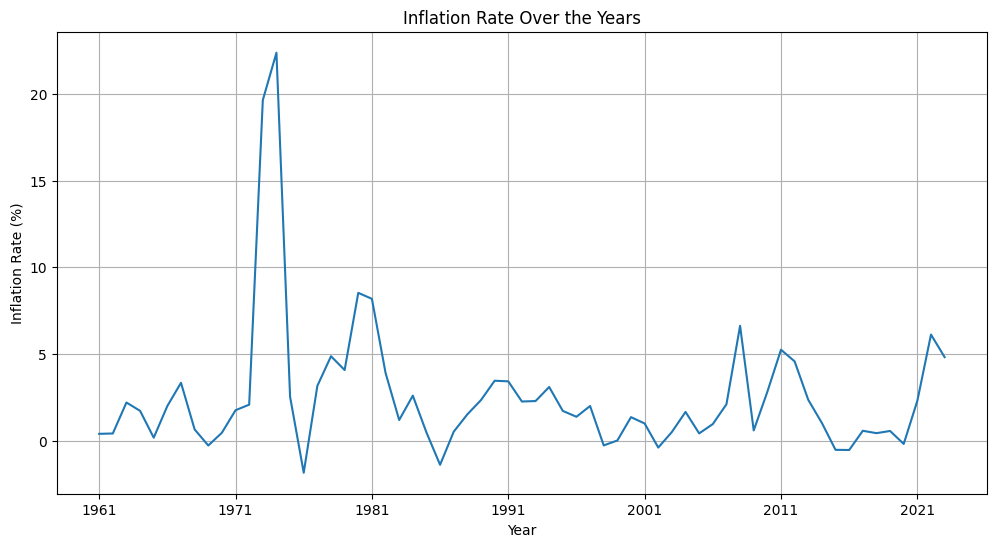

In [6]:
# Inflation Rate over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=inflation_df, x="Year", y="Inflation Rate")
plt.xticks(np.arange(min(inflation_df["Year"]), max(inflation_df["Year"]) + 1, 10))
plt.title("Inflation Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.grid(True)
plt.show()


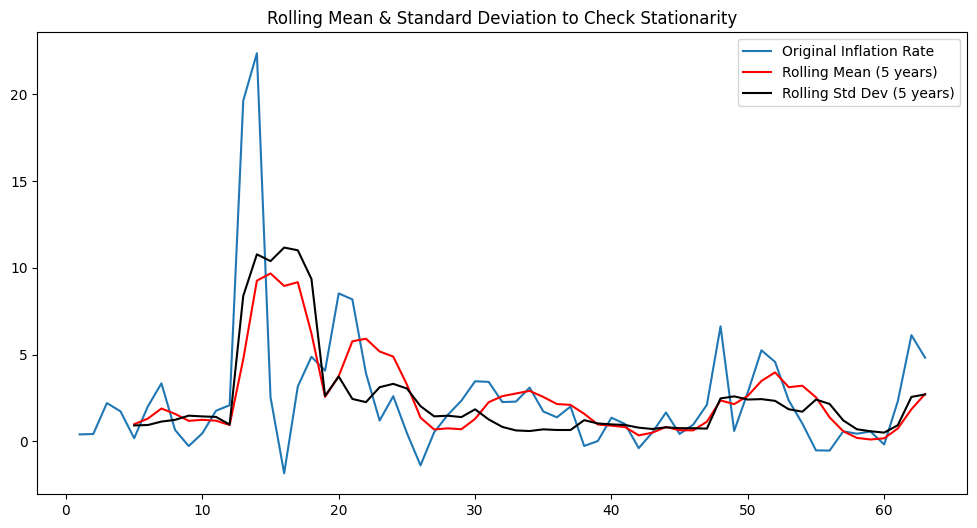

ADF Test Statistic: -3.9624073867650513
p-value: 0.0016206675192957532
Critical Values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
The data is stationary


In [7]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
# Compute rolling statistics
rolling_mean = inflation_df["Inflation Rate"].rolling(window=5).mean()
rolling_std = inflation_df["Inflation Rate"].rolling(window=5).std()

# Plot the statistics
plt.figure(figsize=(12, 6))
plt.plot(inflation_df["Inflation Rate"], label="Original Inflation Rate")
plt.plot(rolling_mean, color="red", label="Rolling Mean (5 years)")
plt.plot(rolling_std, color="black", label="Rolling Std Dev (5 years)")
plt.legend()
plt.title("Rolling Mean & Standard Deviation to Check Stationarity")
plt.show()

# ADF Test
result = adfuller(inflation_df["Inflation Rate"])
print("ADF Test Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])


if result[1] < 0.05:
    print("The data is stationary")
else:
    print("The data is non-stationary")



## Analysis
Since inflation is stationary, its statistical properties—such as mean and variance—remain stable over time, indicating that past data can reliably inform future expectations. We can use the inflation level to measure and forecast price index across time, using 2023 (dataset's latest) as the base year.

In [8]:
inflation_df

,Year,Inflation Rate
1,1961,0.400000
2,1962,0.419580
3,1963,2.205200
4,1964,1.726096
5,1965,0.178611
...,...,...
59,2019,0.565261
60,2020,-0.181917
61,2021,2.304860
62,2022,6.121060


In [9]:
base_year = 2023
base_inflation = inflation_df[inflation_df['Year'] == base_year]
base_index = inflation_df.loc[inflation_df["Year"] == base_year].index[0]

future_years = pd.DataFrame({"Year": range(int(inflation_df["Year"].min()), 2031)})
inflation_df = pd.merge(future_years, inflation_df, on="Year", how="left")

avg_inflation = inflation_df['Inflation Rate'].mean()
inflation_df["Inflation Rate"].fillna(avg_inflation, inplace=True)

# Generate Price Index
inflation_df.loc[inflation_df["Year"] == base_year, "Price Index (Base 2023)"] = 100

# Calculate Price Index using lag
for i in range(base_index, len(inflation_df)):
    prev_year = inflation_df.iloc[i - 1]["Year"]
    curr_year = inflation_df.iloc[i]["Year"]
    inflation_df.loc[inflation_df["Year"] == curr_year, "Price Index (Base 2023)"] = (
        inflation_df.loc[inflation_df["Year"] == prev_year, "Price Index (Base 2023)"].values[0] 
        * (1 + inflation_df.loc[inflation_df["Year"] == curr_year, "Inflation Rate"].values[0] / 100)
    )

for i in range(base_index, -1, -1):
    next_year = inflation_df.iloc[i + 1]["Year"]
    curr_year = inflation_df.iloc[i]["Year"]
    inflation_df.loc[inflation_df["Year"] == curr_year, "Price Index (Base 2023)"] = (
        inflation_df.loc[inflation_df["Year"] == next_year, "Price Index (Base 2023)"].values[0] 
        / (1 + inflation_df.loc[inflation_df["Year"] == next_year, "Inflation Rate"].values[0] / 100)
    )

inflation_df.to_csv('../data/cleaned/inflation_cleaned.csv', index=False)

/var/folders/pf/xn094ngs70lb3jh0xpvlzx8c0000gn/T/ipykernel_52030/609857705.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inflation_df["Inflation Rate"].fillna(avg_inflation, inplace=True)
